# PCA Analysis on *Ostrea lurida*

In [2]:
library("adegenet") #for storing genetic data and running PCA
library("PCAviz")  #Visualizing output of PCA
library("cowplot") #Used with PCAviz

## m80x55-maf0256 combined

In [3]:
load("../Inputs/OL-c85t8-m80x50-maf025-u.genind")
stratted.u

/// GENIND OBJECT /////////

 // 105 individuals; 7,414 loci; 14,828 alleles; size: 10 Mb

 // Basic content
   @tab:  105 x 14828 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 14828 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


A function to fill in missing data. At each locus, for each individual missing data at that locus, it randomly draws two alleles from the **rangewide, overall** allele frequency.

In [4]:
NA.afDraw<- function(ind){
  ind.mat <- ind@tab
  new.mat <- ind.mat
  af = colSums(ind.mat[,seq(1,ncol(ind.mat)-1,2)],na.rm = TRUE)/
      (2*apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],2,function(x) sum(!is.na(x))))
  af.Draw <- function(geno, af){
     new <- function(geno,af){
        if(is.na(geno)){
        newA = rbinom(1,2,af)
        }
        else {newA <- geno}
        return(newA)
   }
  new.row <- mapply(geno,af,FUN = new)
  return(new.row)}
  
  new.mat[,seq(1,ncol(ind.mat)-1,2)] <- t(apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],1,af.Draw,af))
  new.mat[,seq(2,ncol(ind.mat),2)] <- 2-new.mat[,seq(1,ncol(ind.mat)-1,2)]
  new.ind <- ind
  new.ind@tab <- new.mat
  return(new.ind)
}

In [5]:
u.na <- NA.afDraw(stratted.u)

Select the number of axes: 


You can reproduce this result non-interactively with: 
dudi.pca(df = u.na, center = TRUE, scale = TRUE, scannf = FALSE, nf = integer(0))



ERROR: Error in if (nf <= 0) nf <- 2: argument is of length zero


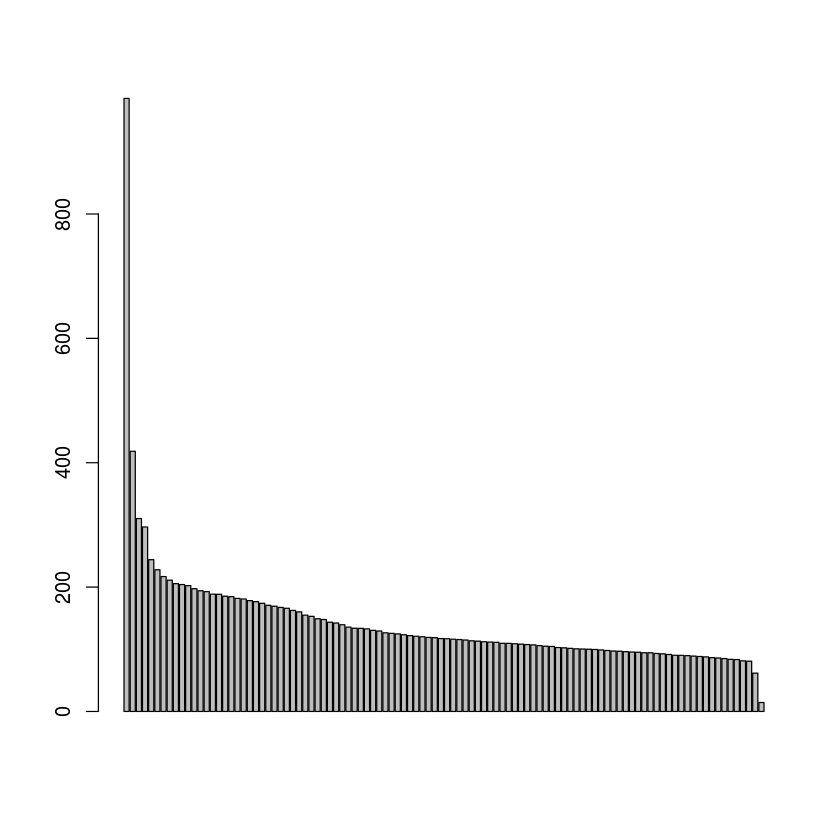

In [10]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = T)

In [16]:
levels(strata(u.na)$REGION)

[1] "NWBC"           "Ladysmith"      "Puget+Victoria" "Willapa"       
[5] "Oregon"         "NoCal"          "SoCal"

In [18]:
pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = F, nf = 30)

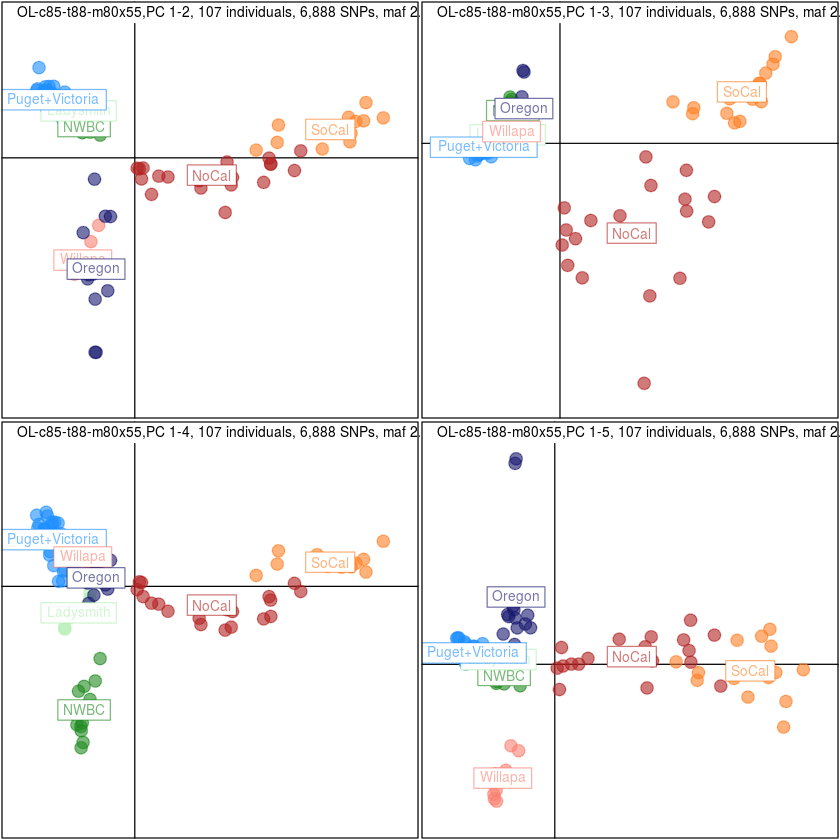

In [20]:
col18 <- funky(length(unique(u.na@strata$POPULATION)))
#Colors that match the neutral Structure results
col6 <-  c("forestgreen", "darkseagreen2", "dodgerblue", "salmon", "midnightblue", "firebrick","chocolate1")

par(mfrow=c(2,2))
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=2, 
        sub = "OL-c85-t88-m80x55,PC 1-2, 105 individuals, 6,888 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=3, 
        sub = "OL-c85-t88-m80x55,PC 1-3, 107 individuals, 6,888 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=4, 
        sub = "OL-c85-t88-m80x55,PC 1-4, 107 individuals, 6,888 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$REGION,xax=1,yax=5, 
        sub = "OL-c85-t88-m80x55,PC 1-5, 107 individuals, 6,888 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

I use s.label to help identify individuals that are in weird places

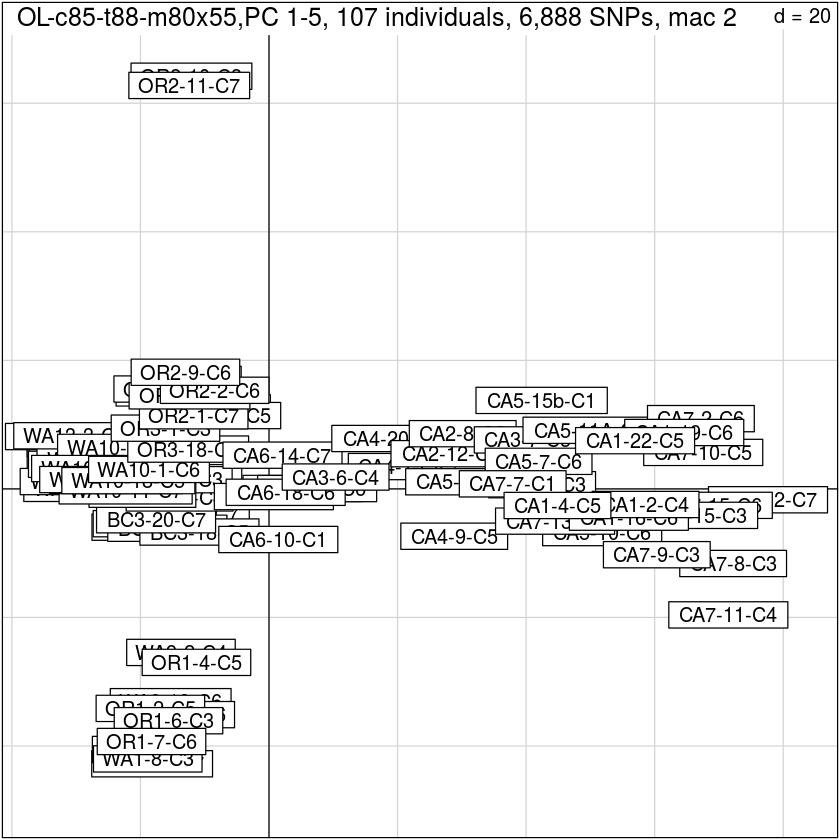

In [22]:
s.label(pca$li, xax=1,yax=5, 
        sub = "OL-c85-t88-m80x55,PC 1-5, 107 individuals, 6,888 SNPs, mac 2",
        possub = "topleft")

Get percent contribution of each PC 

In [24]:
eig.perc <- 100*pca$eig/sum(pca$eig)
head(eig.perc)

[1] 6.648926 2.822010 2.091975 2.000595 1.646089 1.537007

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [26]:
li <-pca$li
c1 <- pca$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(u.na$strata, u.na$other$LATITUDE,u.na$other$LONGITUDE))
colnames(info_mat) <- c("Population","Location","Region","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

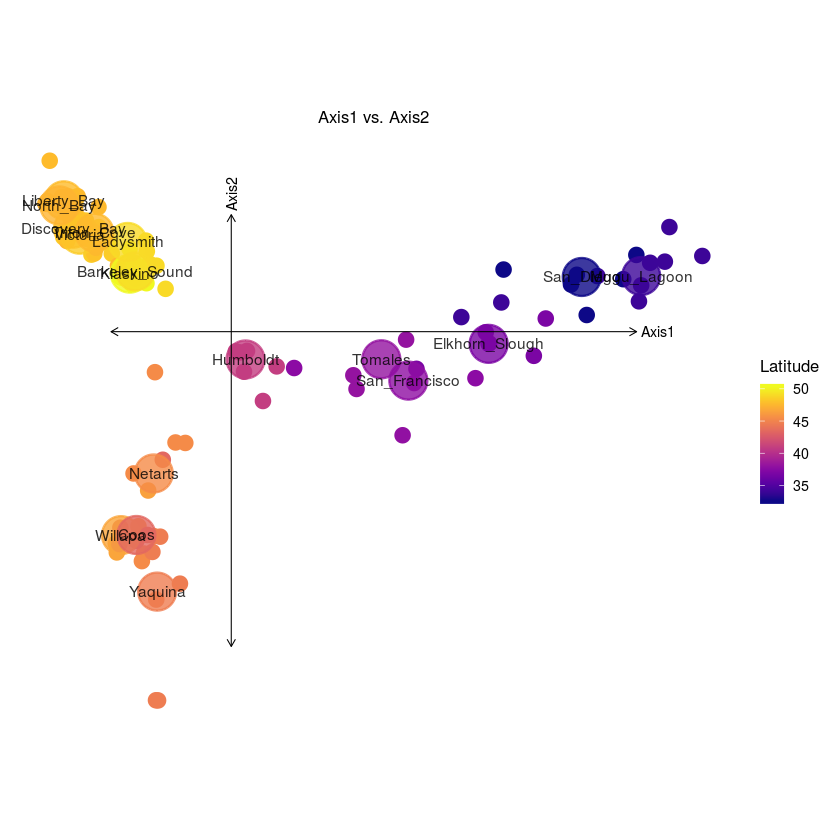

In [27]:
p = list(size=4) 
plot(pviz,color = "Latitude", draw.points = T, group.summary.labels = T, draw.pc.axes = T, geom.point.params = p)

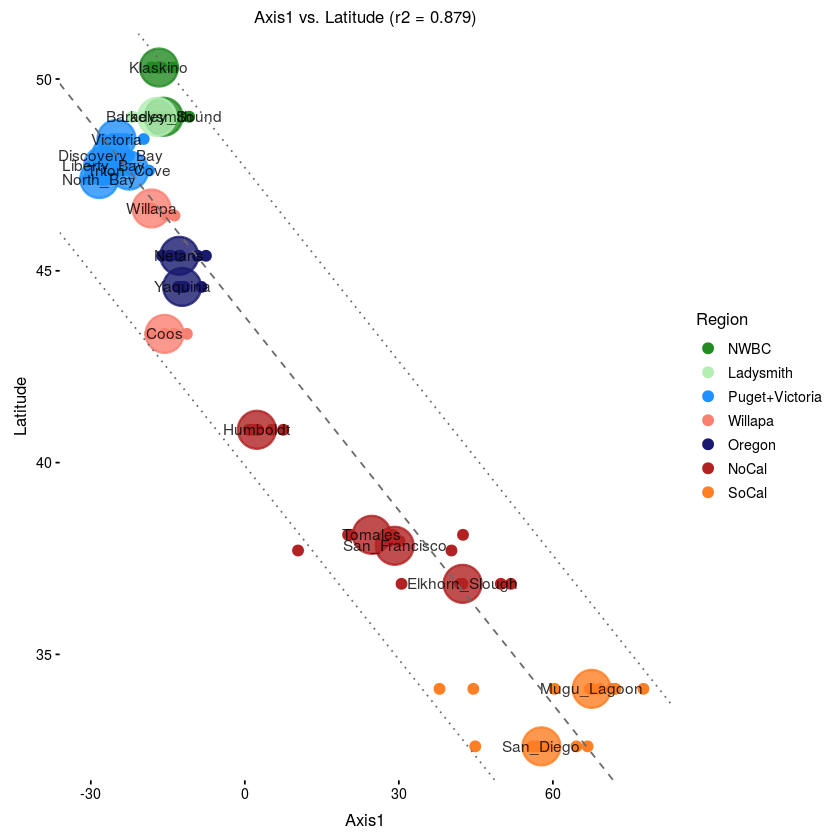

In [31]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = T)

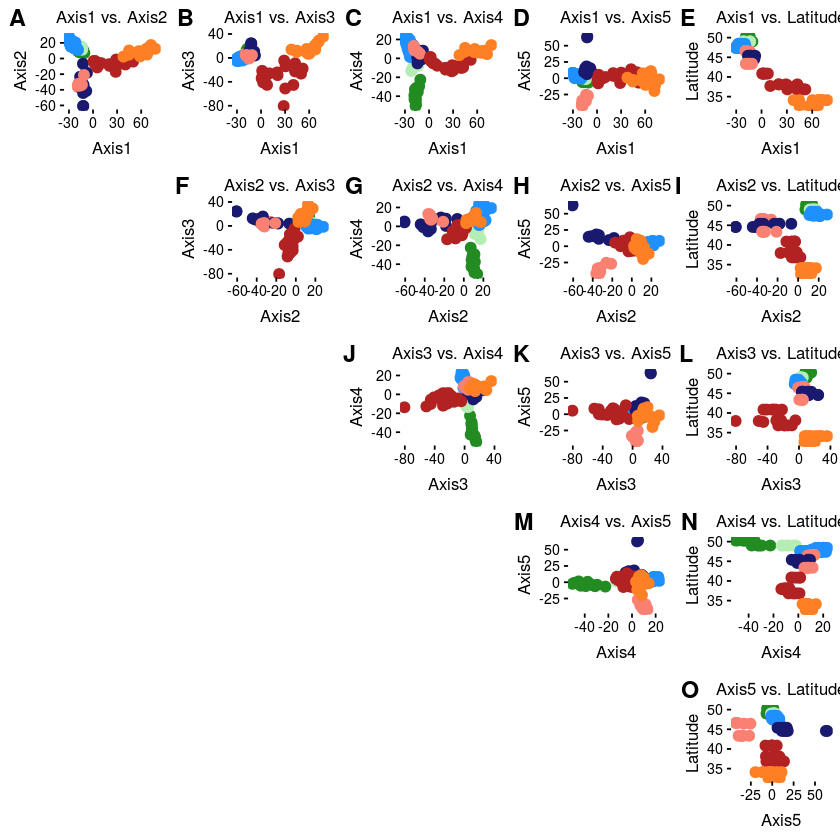

In [32]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",colors = col6,draw.points = T,scale.pc.axes = 0.6, show.legend=F)

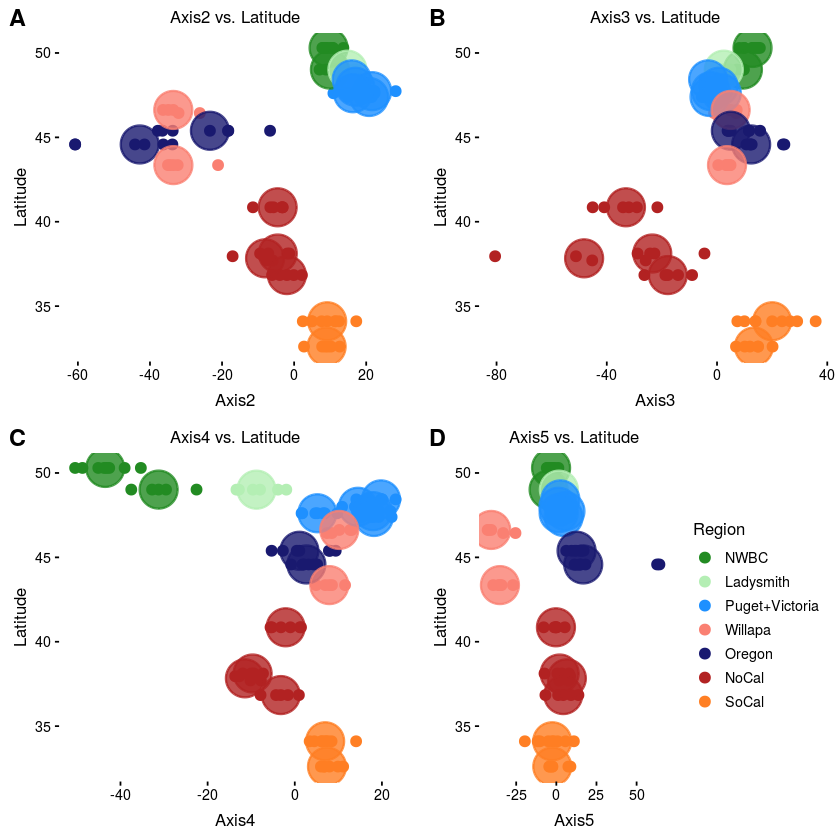

In [54]:
p = list(size=6)
A2 <- plot(pviz,coords = c("Axis2","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,draw.points =T,
     group.summary.labels = F,draw.linear.fit = F, coord_fixed=T)
A3 <- plot(pviz,coords = c("Axis3","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A4 <- plot(pviz,coords = c("Axis4","Latitude"),group="Population",
     show.legend = F,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
A5 <- plot(pviz,coords = c("Axis5","Latitude"),group="Population",
     show.legend = T,color = "Region",colors = col6,
     draw.points =T,group.summary.labels = F,draw.linear.fit = F)
plot_grid(A2,A3,A4,A5, labels = c('A','B','C','D'))

## M80x55 neutI2

In [1]:
load("../Inputs/OL--maf025-neutI2-u.genind")
stratted.u

Loading required package: adegenet
Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




/// GENIND OBJECT /////////

 // 107 individuals; 6,795 loci; 13,590 alleles; size: 9.3 Mb

 // Basic content
   @tab:  107 x 13590 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 13590 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, REGION, NS )
   @other: a list containing: LATITUDE  LONGITUDE 


In [4]:
m60x70.maf <- NA.afDraw(stratted.u)

In [5]:
pca.m60x70.maf <- dudi.pca(m60x70.maf,cent=TRUE,scale=TRUE,scannf = FALSE,nf=20)

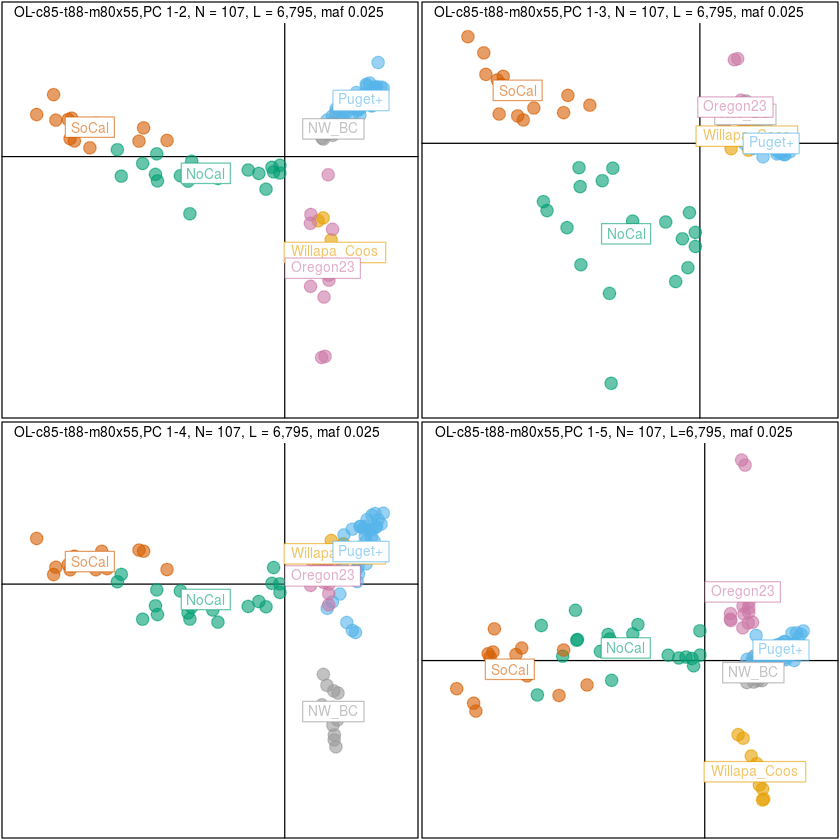

In [23]:
par(mfrow=c(2,2))
s.class(pca.m60x70.maf$li, strata(m60x70.maf)$REGION,xax=1,yax=2, 
        sub = "OL-c85-t88-m80x55,PC 1-2, N = 107, L = 6,795, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m60x70.maf$li, strata(m60x70.maf)$REGION,xax=1,yax=3, 
        sub = "OL-c85-t88-m80x55,PC 1-3, N = 107, L = 6,795, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m60x70.maf$li, strata(m60x70.maf)$REGION,xax=1,yax=4, 
        sub = "OL-c85-t88-m80x55,PC 1-4, N= 107, L = 6,795, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m60x70.maf$li, strata(m60x70.maf)$REGION,xax=1,yax=5, 
        sub = "OL-c85-t88-m80x55,PC 1-5, N= 107, L=6,795, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

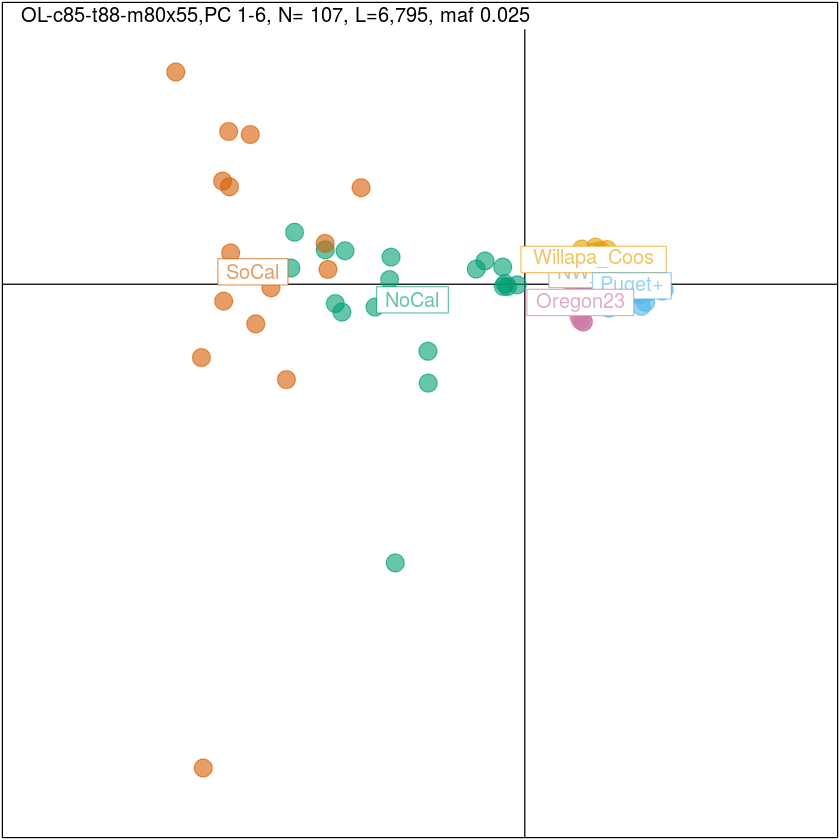

In [44]:
s.class(pca.m60x70.maf$li, strata(m60x70.maf)$REGION,xax=1,yax=6, 
        sub = "OL-c85-t88-m80x55,PC 1-6, N= 107, L=6,795, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

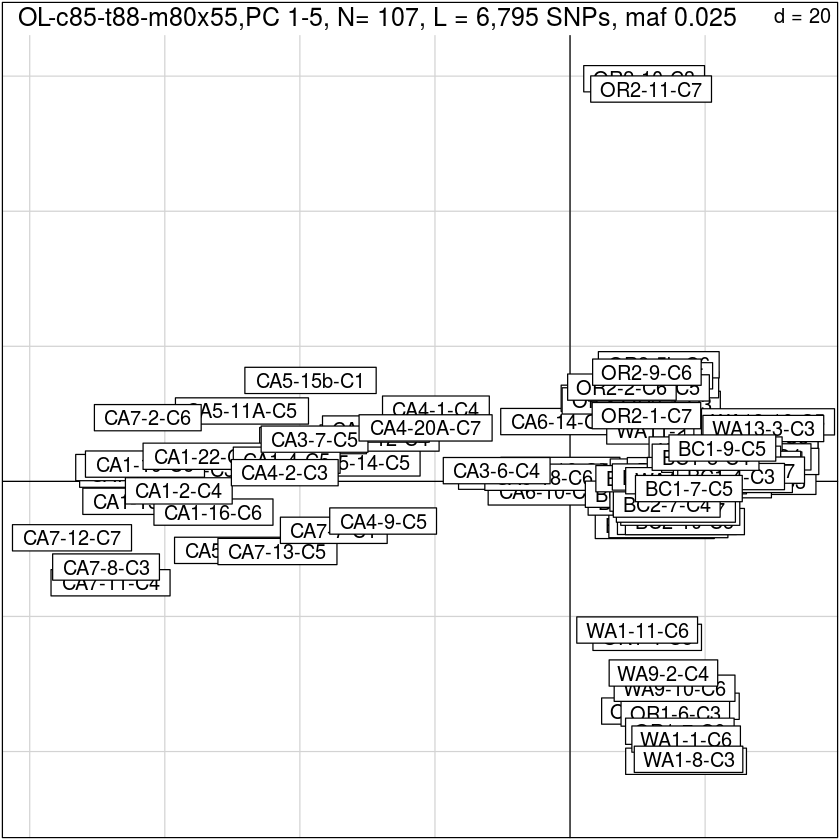

In [24]:
s.label(pca.m60x70.maf$li, xax=1,yax=5, 
        sub = "OL-c85-t88-m80x55,PC 1-5, N= 107, L = 6,795 SNPs, maf 0.025",
        possub = "topleft")

Get percent contribution of each PC 

In [6]:
eig.perc <- 100*pca.m60x70.maf$eig/sum(pca.m60x70.maf$eig)
head(eig.perc)

[1] 6.398995 2.737826 2.032382 1.987280 1.643247 1.537577

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [9]:
li <-pca.m60x70.maf$li
c1 <- pca.m60x70.maf$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(m60x70.maf$strata, m60x70.maf$other$LATITUDE,m60x70.maf$other$LONGITUDE))
colnames(info_mat) <- c("Population","Region","North.South","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

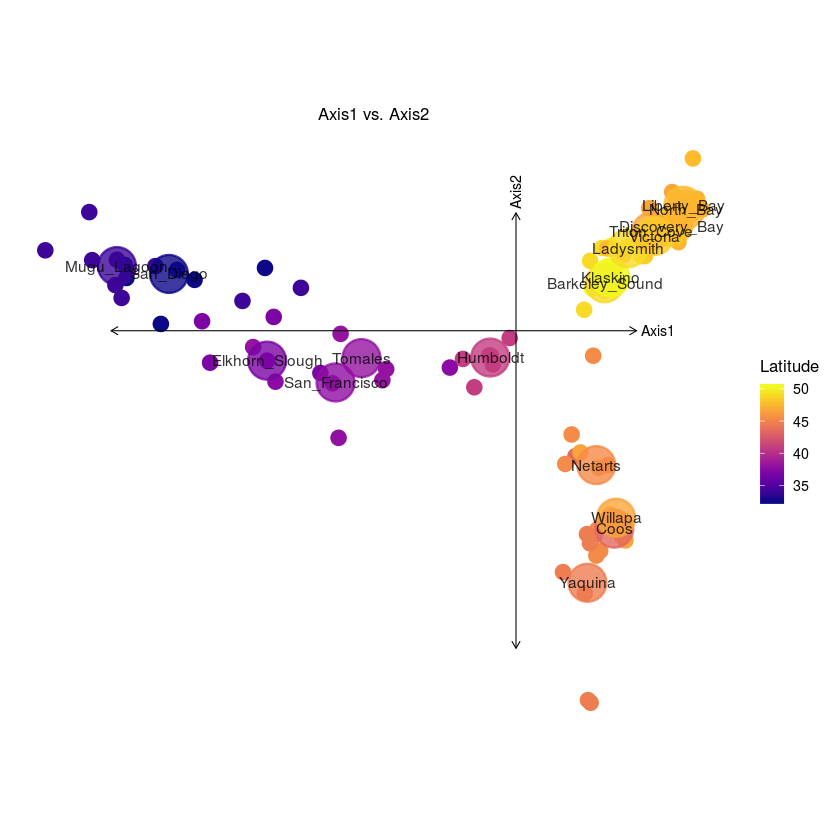

In [10]:
p = list(size=4) 
plot(pviz,color = "Latitude", draw.points = T, group.summary.labels = T, draw.pc.axes = T, geom.point.params = p)

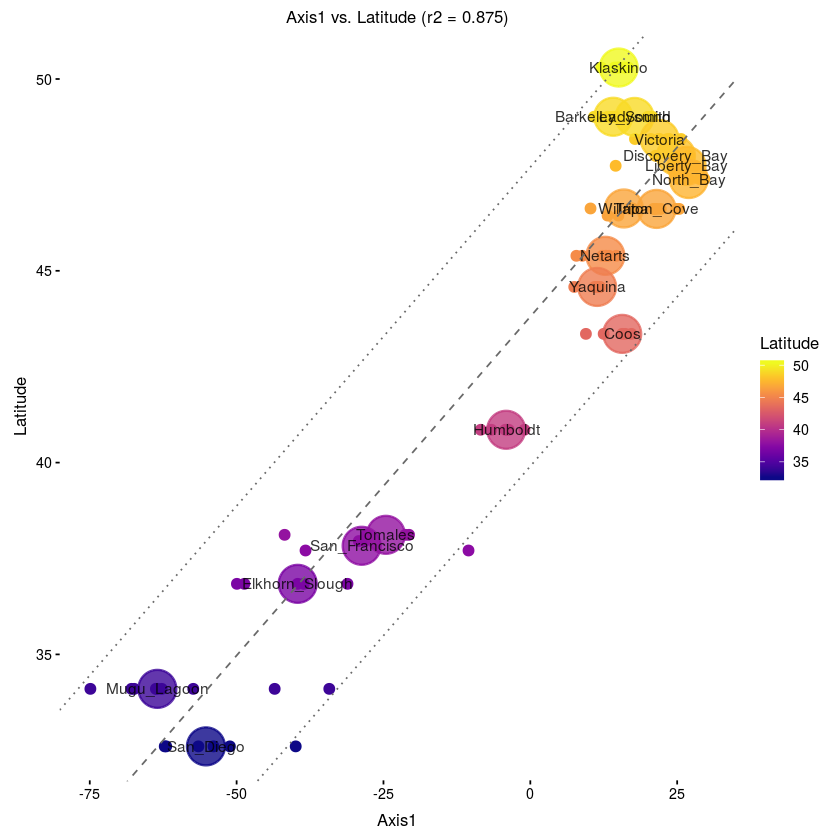

In [17]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",show.legend = T,color="Latitude",draw.points =T,group.summary.labels = T)

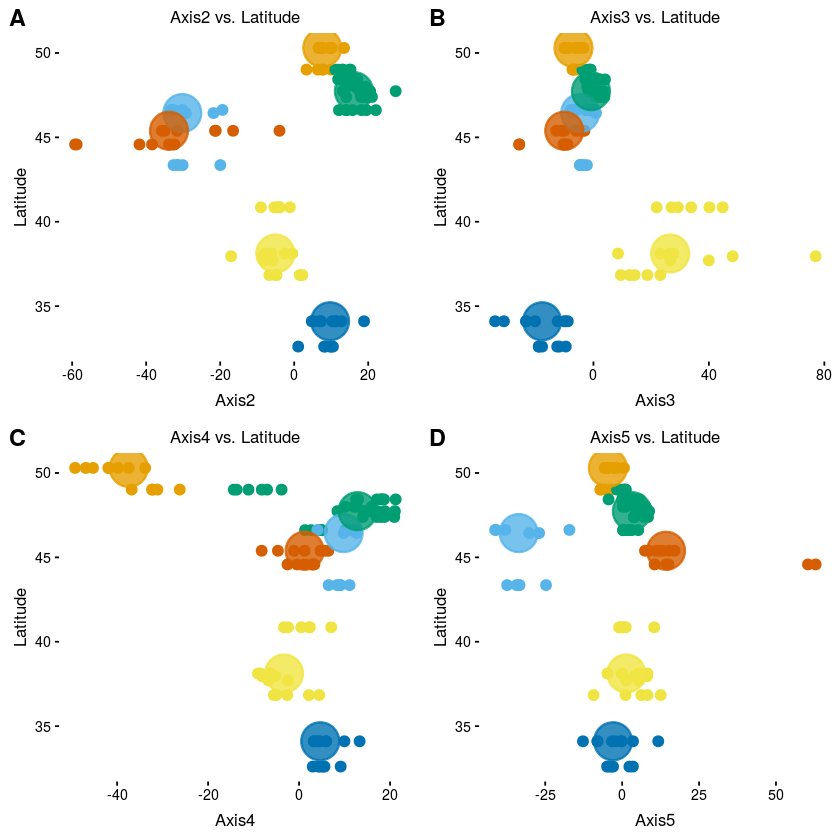

In [37]:
a <- plot(pviz,coords = c("Axis2","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
b <- plot(pviz,coords = c("Axis3","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
c <- plot(pviz,coords = c("Axis4","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
d <- plot(pviz,coords = c("Axis5","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
plot_grid(a,b,c,d,labels = c("A","B","C","D"))

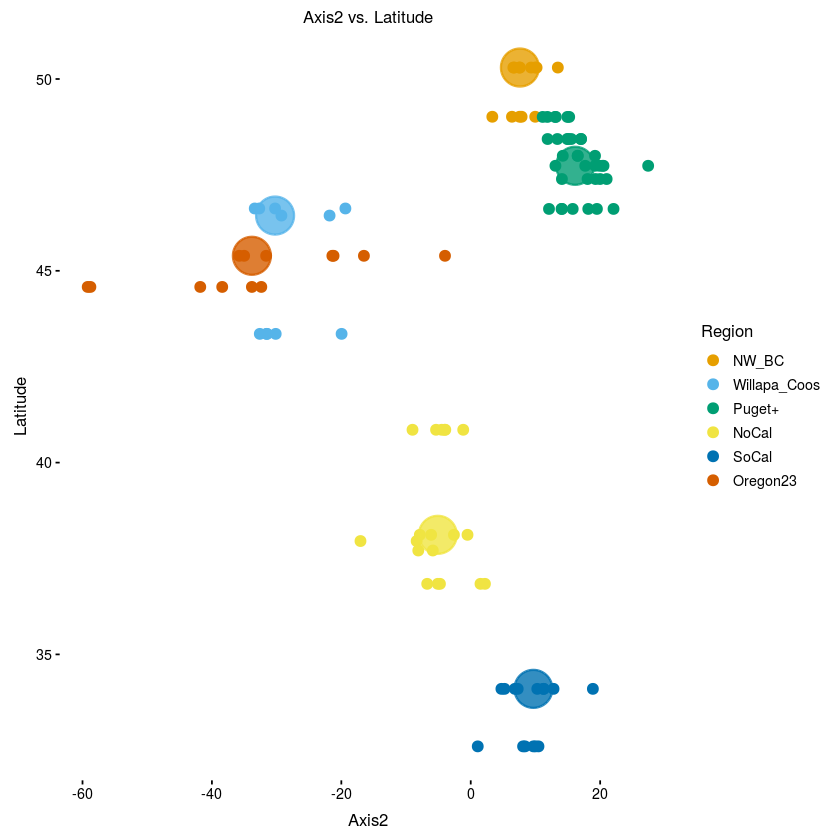

In [36]:
plot(pviz,coords = c("Axis2","Latitude"),group="Region",show.legend = T,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)

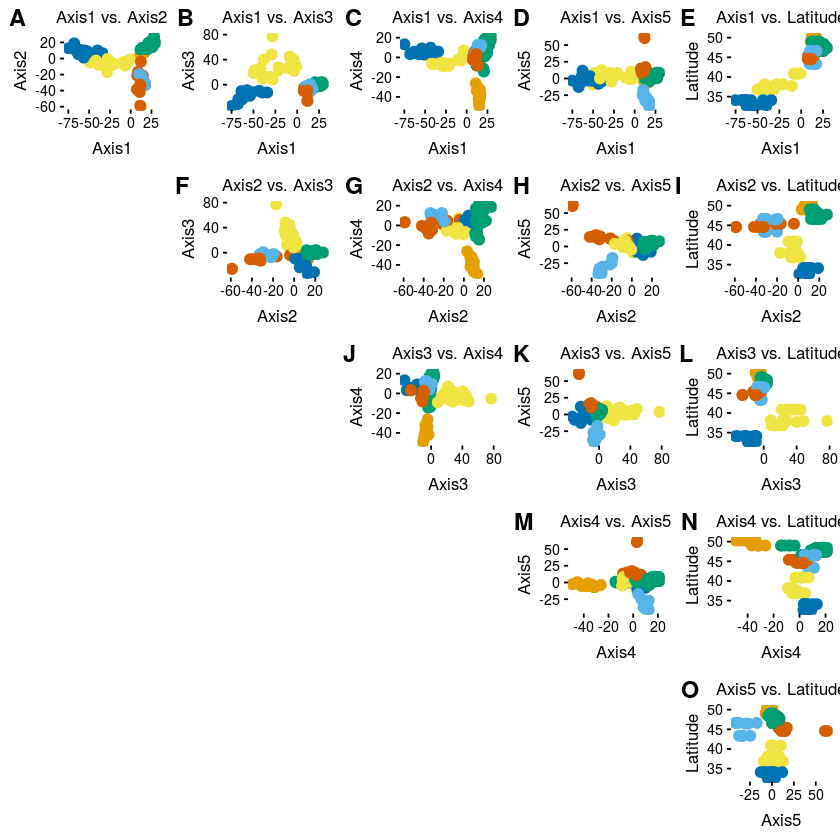

In [18]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",draw.points = T,scale.pc.axes = 1, show.legend=F)

## m80x55-outI2

In [39]:
load("../Inputs/OL-final-c85-t88-Breps-m80x55-maf025-outI2-filt.genind")
stratted.filt

/// GENIND OBJECT /////////

 // 107 individuals; 119 loci; 238 alleles; size: 185.8 Kb

 // Basic content
   @tab:  107 x 238 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 238 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, REGION, NS )
   @other: a list containing: LATITUDE  LONGITUDE 


In [40]:
m80x60.mac <- NA.afDraw(stratted.filt)

In [41]:
pca.m80x60.mac <- dudi.pca(m80x60.mac,cent=TRUE,scale=TRUE,scannf = FALSE,nf=20)

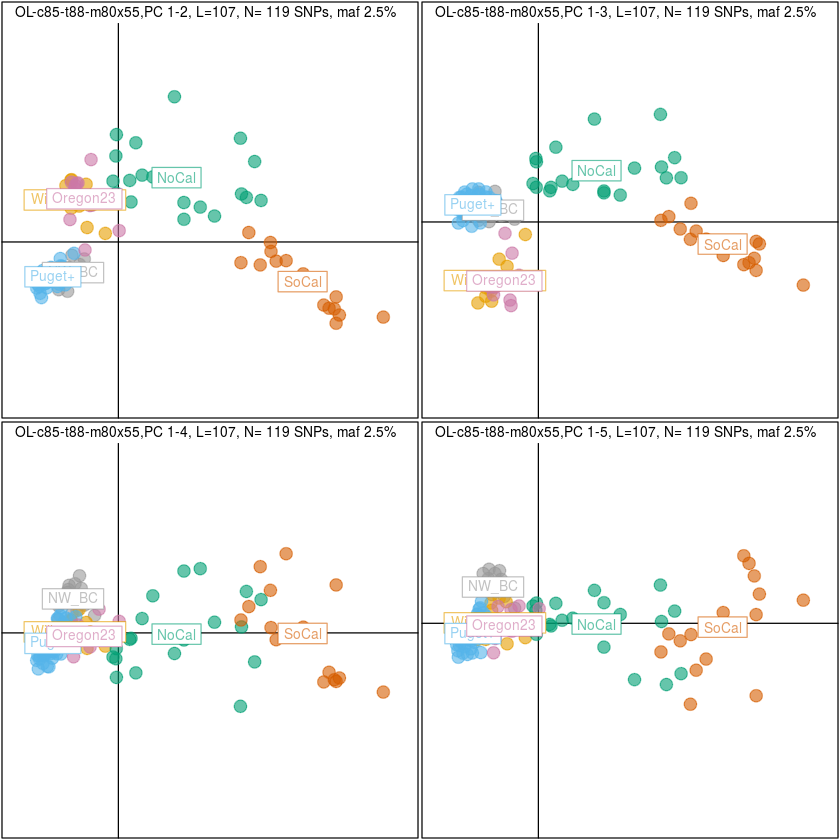

In [37]:
par(mfrow=c(2,2))
s.class(pca.m80x60.mac$li, strata(m80x60.mac)$REGION,xax=1,yax=2, 
        sub = "OL-c85-t88-m80x55,PC 1-2, L=107, N= 119 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x60.mac$li, strata(m80x60.mac)$REGION,xax=1,yax=3, 
        sub = "OL-c85-t88-m80x55,PC 1-3, L=107, N= 119 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x60.mac$li, strata(m80x60.mac)$REGION,xax=1,yax=4, 
        sub = "OL-c85-t88-m80x55,PC 1-4, L=107, N= 119 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x60.mac$li, strata(m80x60.mac)$REGION,xax=1,yax=5, 
        sub = "OL-c85-t88-m80x55,PC 1-5, L=107, N= 119 SNPs, maf 2.5%",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

I use s.label to help identify individuals that are in weird places

Get percent contribution of each PC 

In [42]:
eig.perc <- 100*pca.m80x60.mac$eig/sum(pca.m80x60.mac$eig)
head(eig.perc)

[1] 35.104418  9.811532  7.434679  3.527251  3.344560  2.739896

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [43]:
li <-pca.m80x60.mac$li
c1 <- pca.m80x60.mac$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(m80x60.mac$strata, m80x60.mac$other$LATITUDE,m80x60.mac$other$LONGITUDE))
colnames(info_mat) <- c("Population","Region","North.South","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

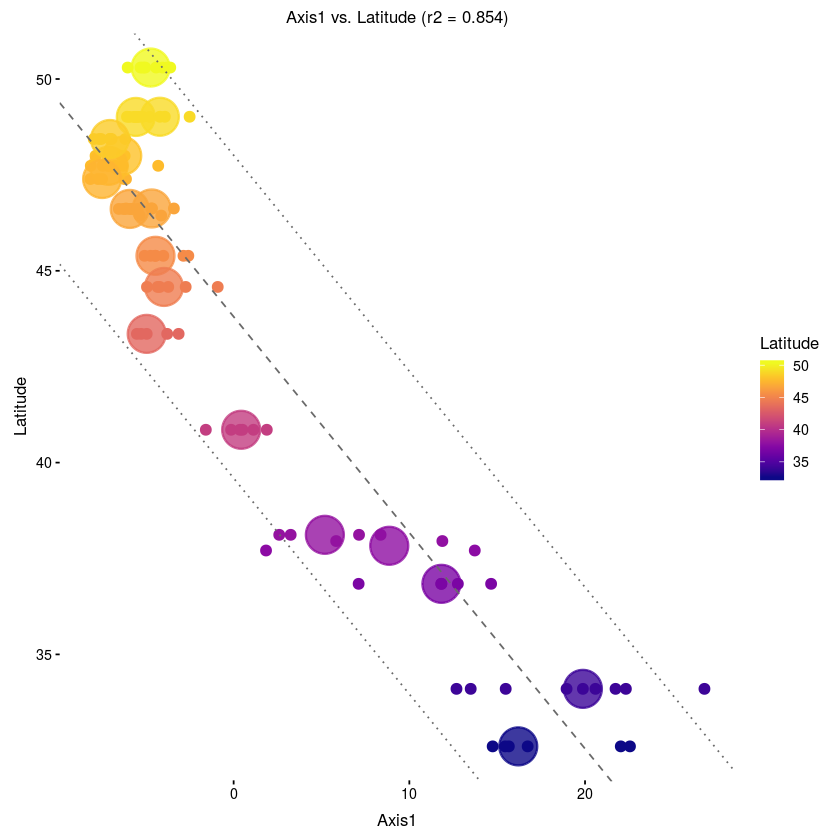

In [47]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",show.legend = T,color="Latitude", group.summary.labels = F, draw.points = T)

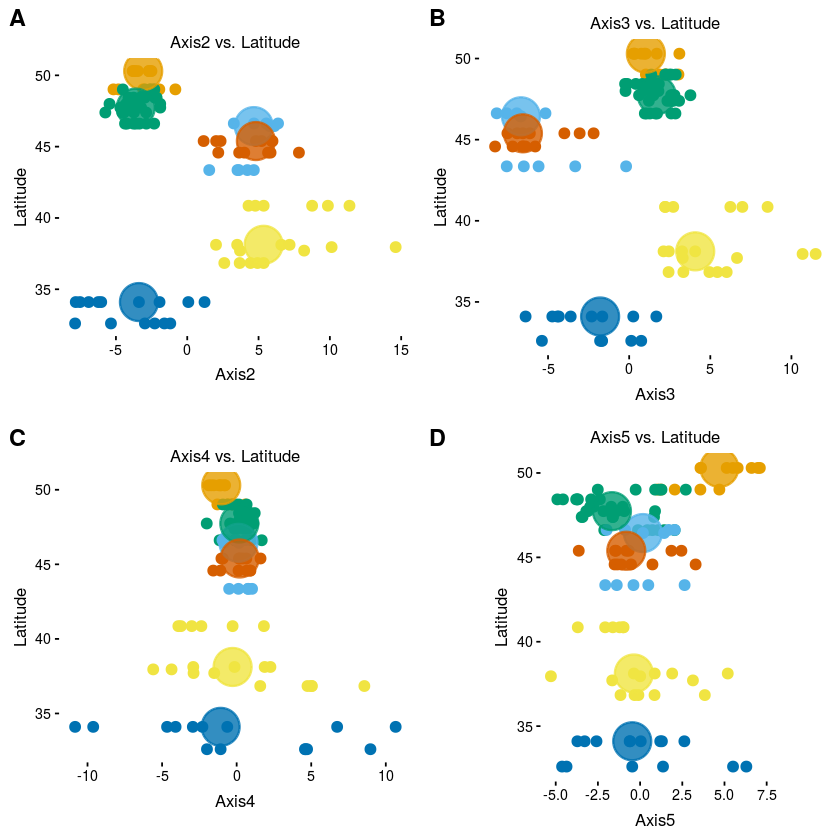

In [48]:
a <- plot(pviz,coords = c("Axis2","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
b <- plot(pviz,coords = c("Axis3","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
c <- plot(pviz,coords = c("Axis4","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
d <- plot(pviz,coords = c("Axis5","Latitude"),group="Region",show.legend = F,color="Region",draw.points =T,group.summary.labels = F,ci = F,draw.linear.fit= F)
plot_grid(a,b,c,d,labels = c("A","B","C","D"))

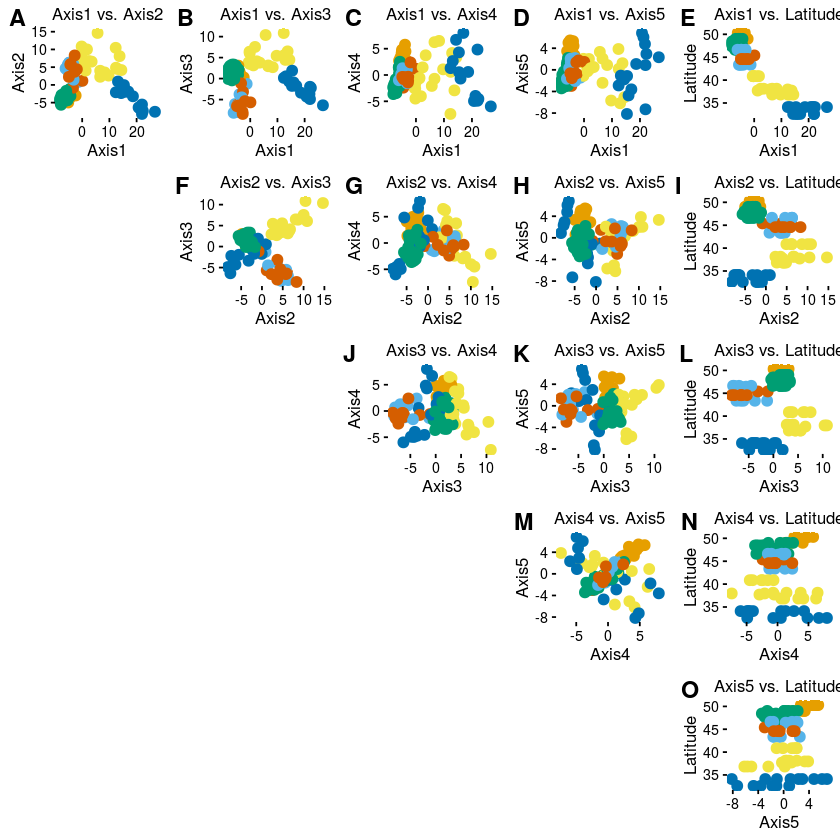

In [40]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",draw.points = T,scale.pc.axes = 0.6, show.legend=F)

## M80x60-Maf 0.025

In [40]:
load("../Inputs/BReps/OL-final-c85-t88-Breps-m80x60-maf025-u.genind")
stratted.maf

/// GENIND OBJECT /////////

 // 112 individuals; 6,132 loci; 12,264 alleles; size: 8.6 Mb

 // Basic content
   @tab:  112 x 12264 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 12264 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 2-9)
   @strata: a data frame with 3 columns ( POPULATION, REGION, NS )
   @other: a list containing: LATITUDE  LONGITUDE 


In [41]:
m80x60.maf <- NA.afDraw(stratted.maf)

In [42]:
pca.m80x60.maf <- dudi.pca(m80x60.maf,cent=TRUE,scale=TRUE,scannf = FALSE,nf=20)

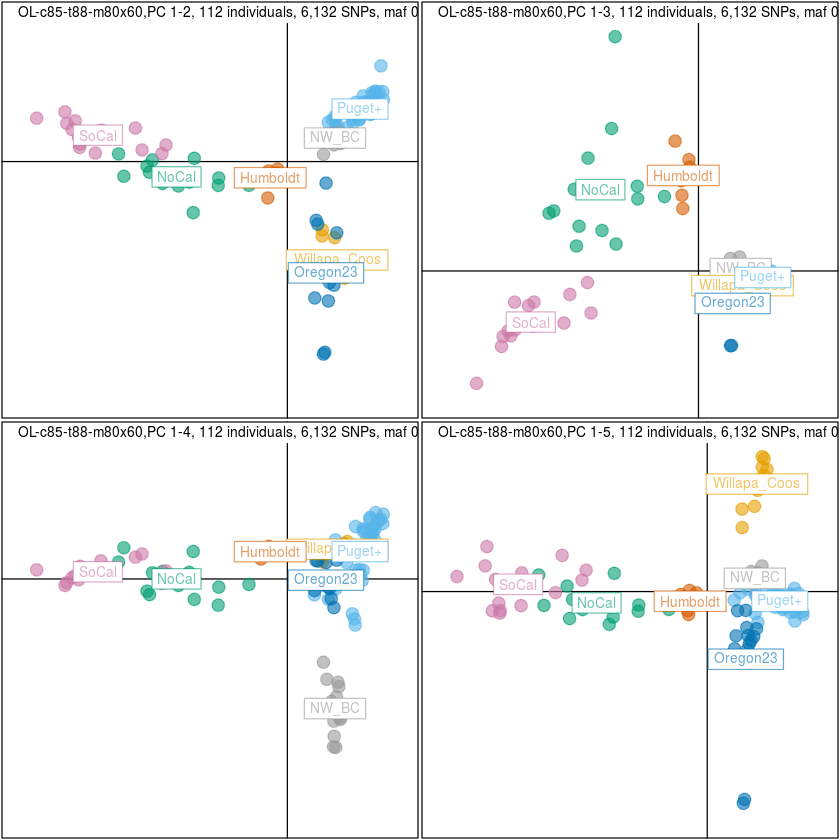

In [44]:
col18 <- funky(length(unique(m80x60.maf@strata$POPULATION)))
#Colorblind friendly colors
col8 <-  c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
col6 <-  c("#999999", "#E69F00", "#56B4E9", "#009E73", "#D55E00", "#CC79A7","#0072B2")

par(mfrow=c(2,2))
s.class(pca.m80x60.maf$li, strata(m80x60.maf)$REGION,xax=1,yax=2, 
        sub = "OL-c85-t88-m80x60,PC 1-2, 112 individuals, 6,132 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x60.maf$li, strata(m80x60.maf)$REGION,xax=1,yax=3, 
        sub = "OL-c85-t88-m80x60,PC 1-3, 112 individuals, 6,132 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x60.maf$li, strata(m80x60.maf)$REGION,xax=1,yax=4, 
        sub = "OL-c85-t88-m80x60,PC 1-4, 112 individuals, 6,132 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x60.maf$li, strata(m80x60.maf)$REGION,xax=1,yax=5, 
        sub = "OL-c85-t88-m80x60,PC 1-5, 112 individuals, 6,132 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

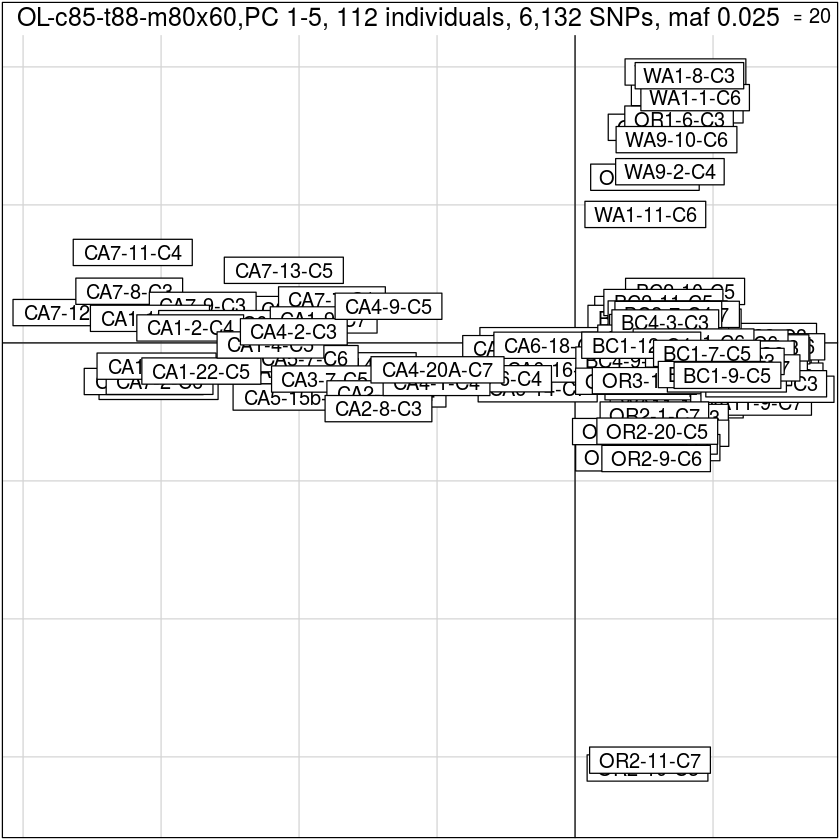

In [45]:
s.label(pca.m80x60.maf$li, xax=1,yax=5, 
        sub = "OL-c85-t88-m80x60,PC 1-5, 112 individuals, 6,132 SNPs, maf 0.025",
        possub = "topleft")

Get percent contribution of each PC 

In [46]:
eig.perc <- 100*pca.m80x60.maf$eig/sum(pca.m80x60.maf$eig)
head(eig.perc)

[1] 6.600692 2.748029 2.015603 1.944359 1.626712 1.478797

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [47]:
li <-pca.m80x60.maf$li
c1 <- pca.m80x60.maf$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(m80x60.maf$strata, m80x60.maf$other$LATITUDE,m80x60.maf$other$LONGITUDE))
colnames(info_mat) <- c("Population","Region","North.South","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

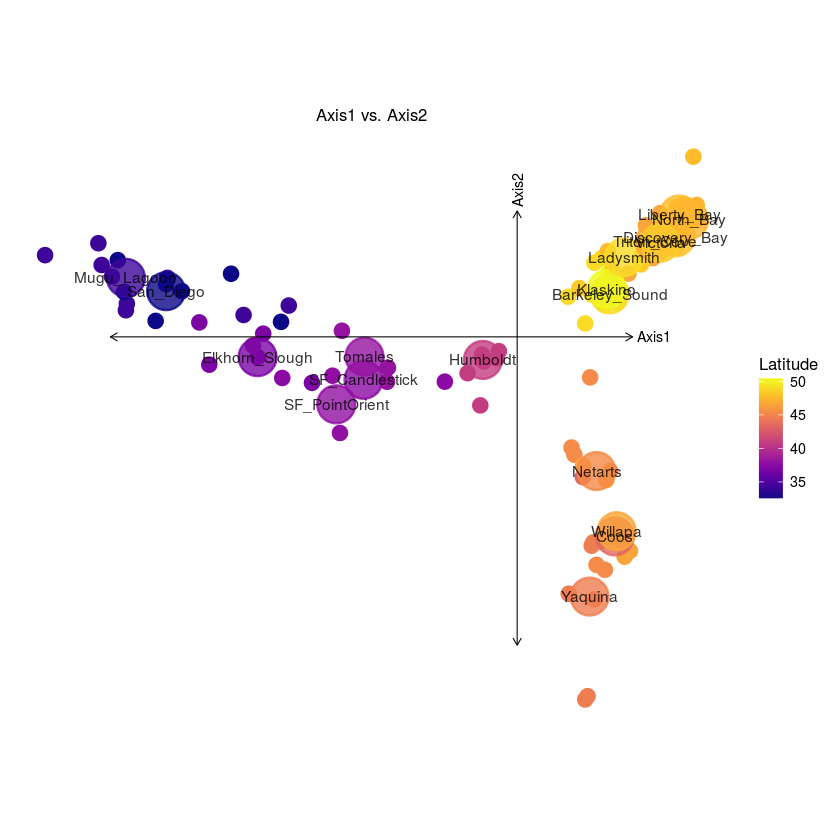

In [48]:
p = list(size=4) 
plot(pviz,color = "Latitude", draw.points = T, group.summary.labels = T, draw.pc.axes = T, geom.point.params = p)

Abbreviations used in plot:
 Population     Population.abbrv
 Barkeley_Sound BS              
 Coos           Cs              
 Discovery_Bay  DB              
 Elkhorn_Slough ES              
 Humboldt       Hm              
 Klaskino       Kl              
 Ladysmith      Ld              
 Liberty_Bay    LB              
 Mugu_Lagoon    ML              
 Netarts        Nt              
 North_Bay      NB              
 San_Diego      SD              
 SF_Candlestick SF              
 SF_PointOrient PO              
 Tomales        Tm              
 Triton_Cove    TC              
 Victoria       Vc              
 Willapa        Wl              
 Yaquina        Yq              


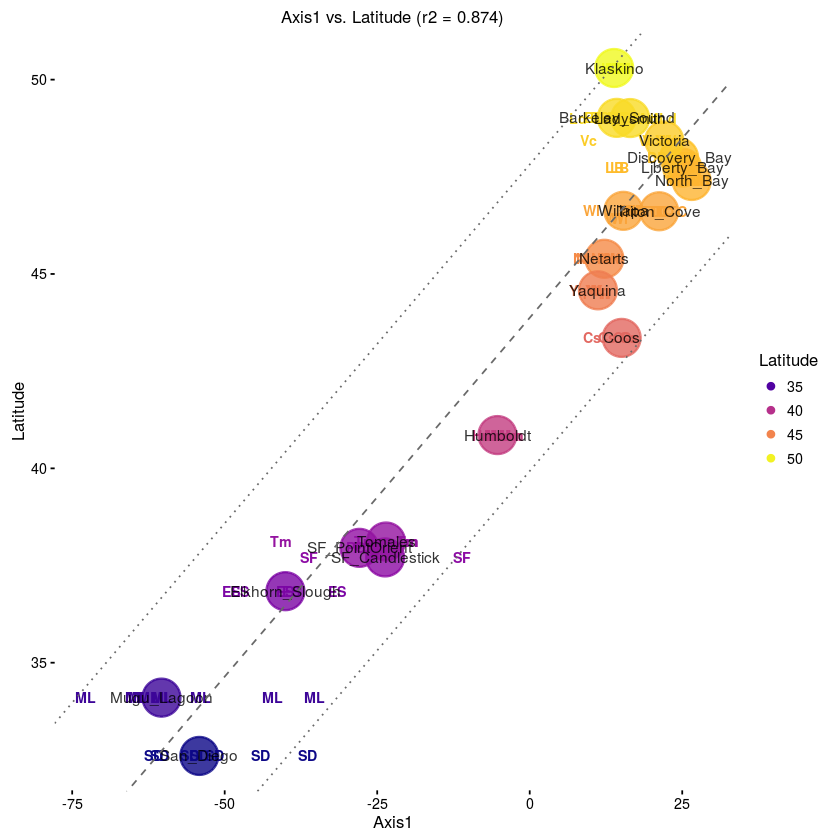

In [49]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",show.legend = T,color="Latitude")

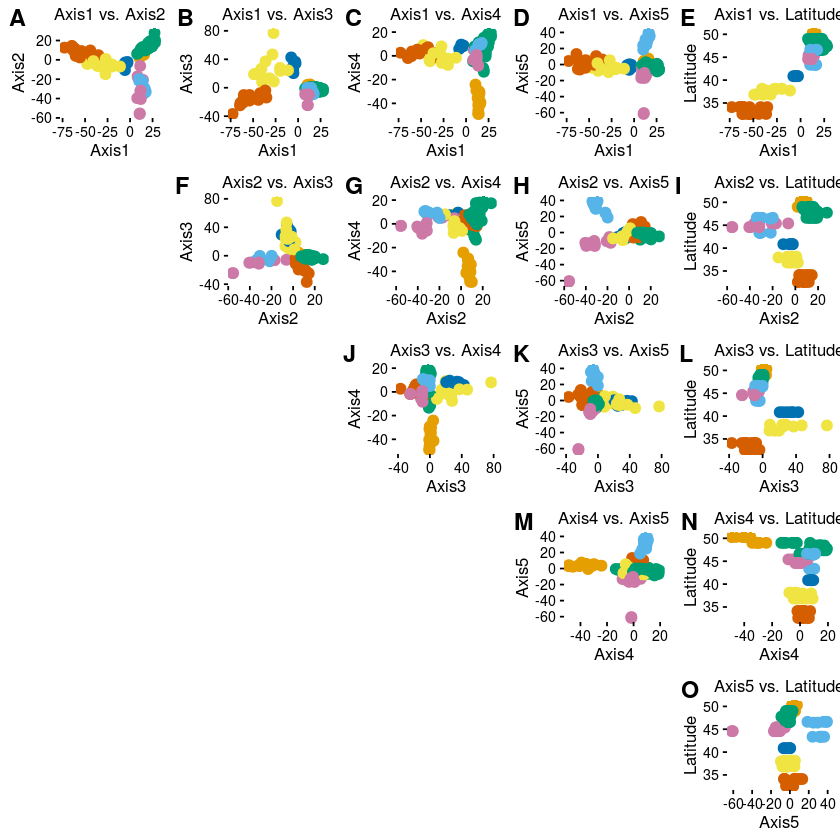

In [50]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",draw.points = T,scale.pc.axes = 0.6, show.legend=F)

## m80x70-mac2

In [51]:
load("../Inputs/BReps/OL-final-c85-t88-Breps-m80x70-mac2-u.genind")
stratted.mac

/// GENIND OBJECT /////////

 // 130 individuals; 4,426 loci; 8,852 alleles; size: 6.8 Mb

 // Basic content
   @tab:  130 x 8852 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 8852 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 2-10)
   @strata: a data frame with 3 columns ( POPULATION, REGION, NS )
   @other: a list containing: LATITUDE  LONGITUDE 


In [52]:
m80x70.mac <- NA.afDraw(stratted.mac)

In [53]:
pca.m80x70.mac <- dudi.pca(m80x70.mac,cent=TRUE,scale=TRUE,scannf = FALSE,nf=20)

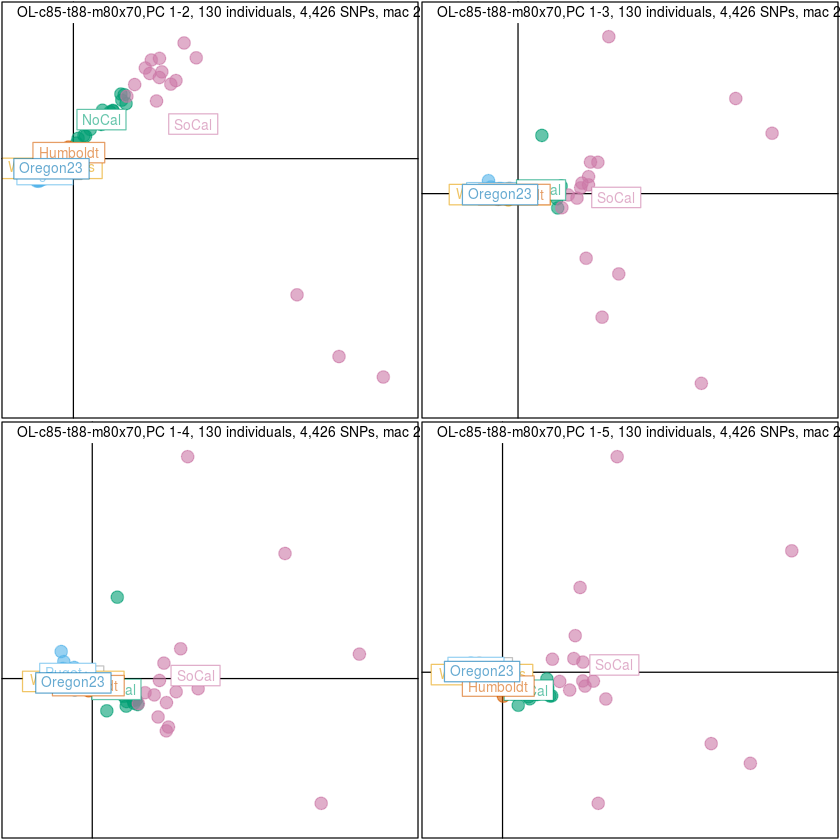

In [54]:
col18 <- funky(length(unique(m80x70.mac@strata$POPULATION)))
#Colorblind friendly colors
col6 <-  c("#999999", "#E69F00", "#56B4E9", "#009E73", "#D55E00", "#CC79A7","#0072B2")

par(mfrow=c(2,2))
s.class(pca.m80x70.mac$li, strata(m80x70.mac)$REGION,xax=1,yax=2, 
        sub = "OL-c85-t88-m80x70,PC 1-2, 130 individuals, 4,426 SNPs, mac 2",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x70.mac$li, strata(m80x70.mac)$REGION,xax=1,yax=3, 
        sub = "OL-c85-t88-m80x70,PC 1-3, 130 individuals, 4,426 SNPs, mac 2",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x70.mac$li, strata(m80x70.mac)$REGION,xax=1,yax=4, 
        sub = "OL-c85-t88-m80x70,PC 1-4, 130 individuals, 4,426 SNPs, mac 2",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x70.mac$li, strata(m80x70.mac)$REGION,xax=1,yax=5, 
        sub = "OL-c85-t88-m80x70,PC 1-5, 130 individuals, 4,426 SNPs, mac 2",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

I use s.label to help identify individuals that are in weird places

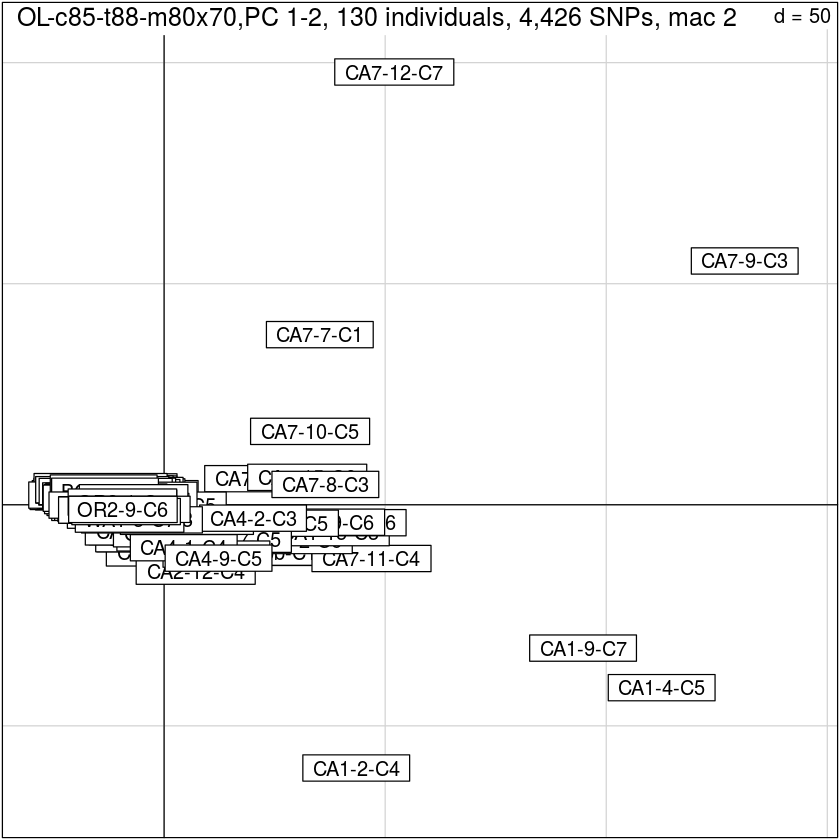

In [55]:
s.label(pca.m80x70.mac$li, xax=1,yax=5,  
        sub = "OL-c85-t88-m80x70,PC 1-2, 130 individuals, 4,426 SNPs, mac 2",
        possub = "topleft")

Get percent contribution of each PC 

In [56]:
eig.perc <- 100*pca.m80x70.mac$eig/sum(pca.m80x70.mac$eig)
head(eig.perc)

[1] 6.177335 3.875740 2.468359 2.223190 2.004979 1.884982

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [57]:
li <-pca.m80x70.mac$li
c1 <- pca.m80x70.mac$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(m80x70.mac$strata, m80x70.mac$other$LATITUDE,m80x70.mac$other$LONGITUDE))
colnames(info_mat) <- c("Population","Region","North.South","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

Abbreviations used in plot:
 Population     Population.abbrv
 Barkeley_Sound BS              
 Coos           Cs              
 Discovery_Bay  DB              
 Elkhorn_Slough ES              
 Humboldt       Hm              
 Klaskino       Kl              
 Ladysmith      Ld              
 Liberty_Bay    LB              
 Mugu_Lagoon    ML              
 Netarts        Nt              
 North_Bay      NB              
 San_Diego      SD              
 SF_Candlestick SF              
 SF_PointOrient PO              
 Tomales        Tm              
 Triton_Cove    TC              
 Victoria       Vc              
 Willapa        Wl              
 Yaquina        Yq              


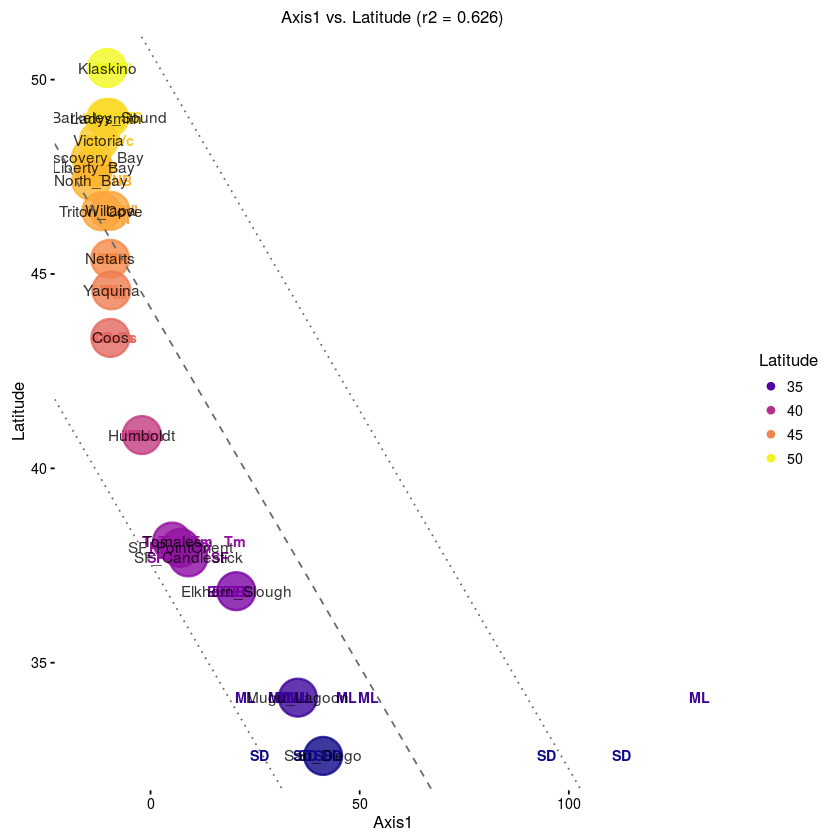

In [58]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",show.legend = T,color="Latitude")

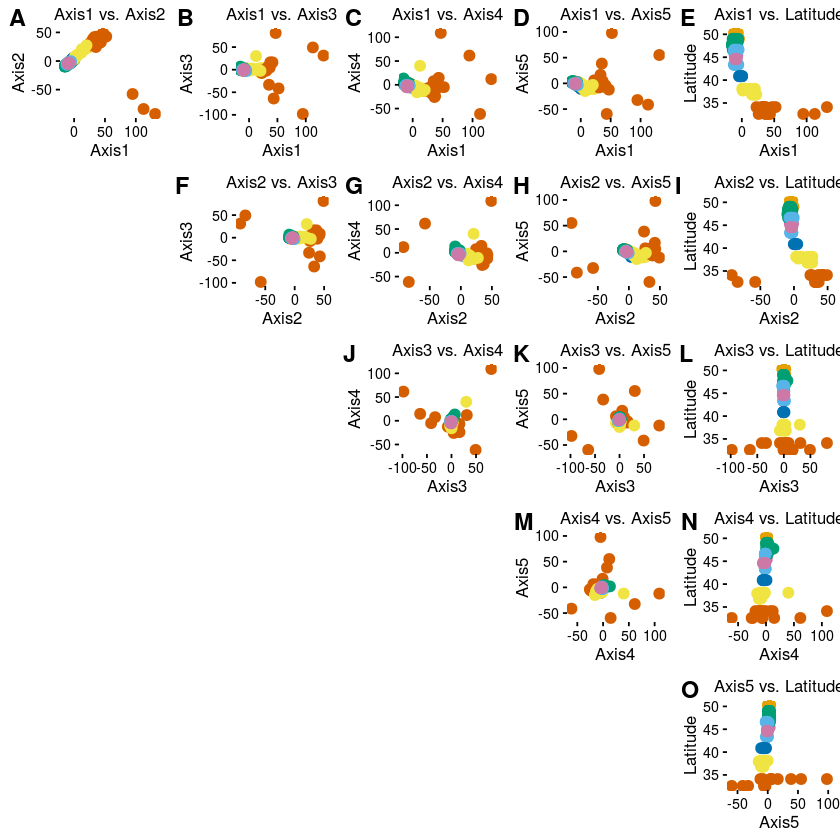

In [59]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",draw.points = T,scale.pc.axes = 0.6, show.legend=F)

## m80x70-maf025

In [60]:
load("../Inputs/BReps/OL-final-c85-t88-Breps-m80x70-maf025-u.genind")
stratted.maf

/// GENIND OBJECT /////////

 // 130 individuals; 3,233 loci; 6,466 alleles; size: 5 Mb

 // Basic content
   @tab:  130 x 6466 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 6466 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 2-10)
   @strata: a data frame with 3 columns ( POPULATION, REGION, NS )
   @other: a list containing: LATITUDE  LONGITUDE 


In [61]:
m80x70.maf <- NA.afDraw(stratted.maf)

In [62]:
pca.m80x70.maf <- dudi.pca(m80x70.maf,cent=TRUE,scale=TRUE,scannf = FALSE,nf=20)

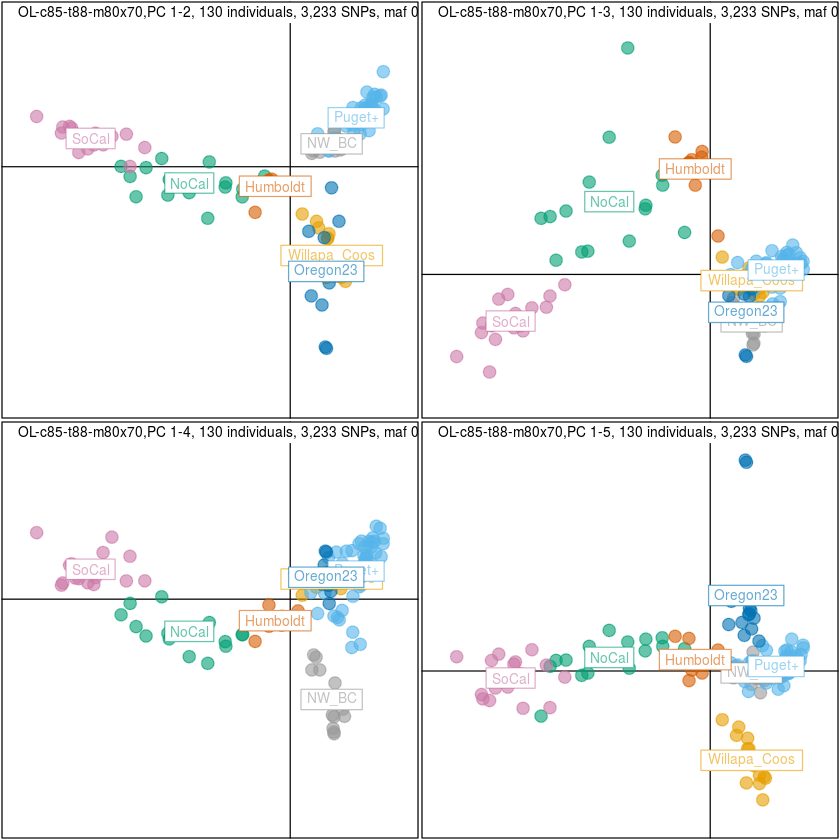

In [63]:
col18 <- funky(length(unique(m80x70.maf@strata$POPULATION)))
#Colorblind friendly colors
col6 <-  c("#999999", "#E69F00", "#56B4E9", "#009E73", "#D55E00", "#CC79A7","#0072B2")

par(mfrow=c(2,2))
s.class(pca.m80x70.maf$li, strata(m80x70.maf)$REGION,xax=1,yax=2, 
        sub = "OL-c85-t88-m80x70,PC 1-2, 130 individuals, 3,233 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x70.maf$li, strata(m80x70.maf)$REGION,xax=1,yax=3, 
        sub = "OL-c85-t88-m80x70,PC 1-3, 130 individuals, 3,233 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x70.maf$li, strata(m80x70.maf)$REGION,xax=1,yax=4, 
        sub = "OL-c85-t88-m80x70,PC 1-4, 130 individuals, 3,233 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca.m80x70.maf$li, strata(m80x70.maf)$REGION,xax=1,yax=5, 
        sub = "OL-c85-t88-m80x70,PC 1-5, 130 individuals, 3,233 SNPs, maf 0.025",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

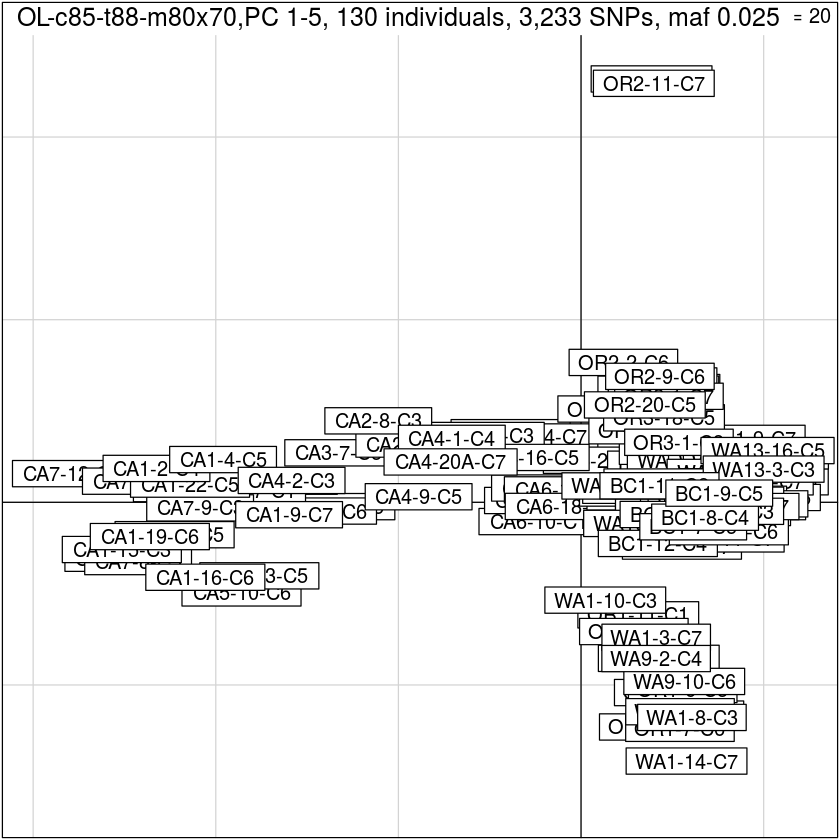

In [64]:
s.label(pca.m80x70.maf$li, xax=1,yax=5, 
        sub = "OL-c85-t88-m80x70,PC 1-5, 130 individuals, 3,233 SNPs, maf 0.025",
        possub = "topleft")

Get percent contribution of each PC 

In [65]:
eig.perc <- 100*pca.m80x70.maf$eig/sum(pca.m80x70.maf$eig)
head(eig.perc)

[1] 6.471764 2.607846 1.922639 1.831034 1.570648 1.377734

### PCAviz
From John Novembre's lab [Github](https://github.com/NovembreLab/PCAviz)

In [66]:
li <-pca.m80x70.maf$li
c1 <- pca.m80x70.maf$c1
#Create dataframe of info like latitude and population for each individual
info_mat <- as.data.frame(cbind(m80x70.maf$strata, m80x70.maf$other$LATITUDE,m80x70.maf$other$LONGITUDE))
colnames(info_mat) <- c("Population","Region","North.South","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=info_mat)

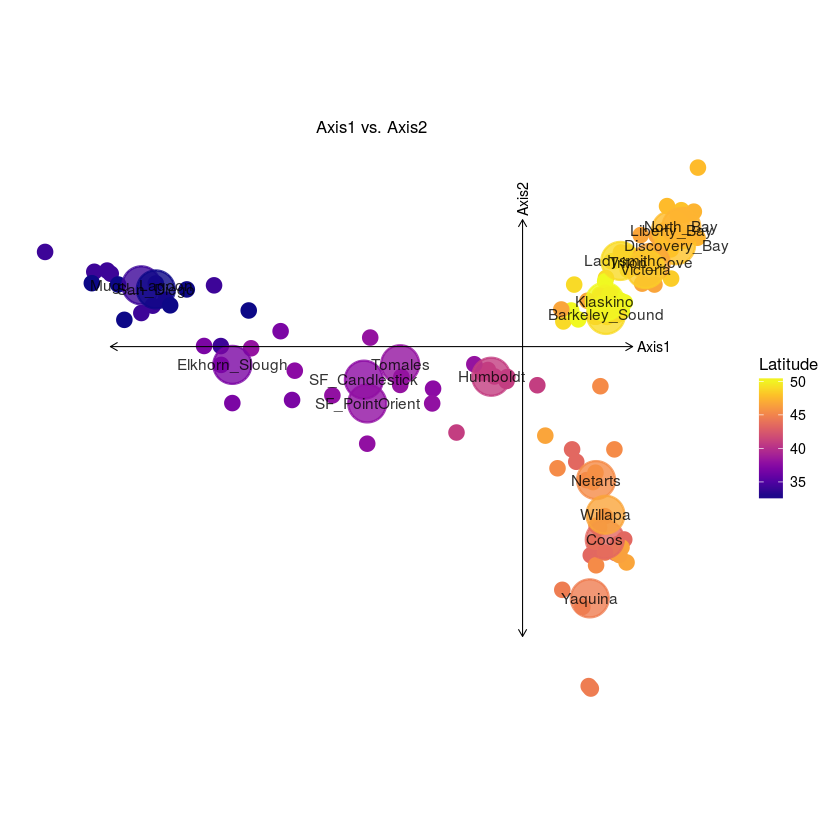

In [67]:
p = list(size=4) 
plot(pviz,color = "Latitude", draw.points = T, group.summary.labels = T, draw.pc.axes = T, geom.point.params = p)

Abbreviations used in plot:
 Population     Population.abbrv
 Barkeley_Sound BS              
 Coos           Cs              
 Discovery_Bay  DB              
 Elkhorn_Slough ES              
 Humboldt       Hm              
 Klaskino       Kl              
 Ladysmith      Ld              
 Liberty_Bay    LB              
 Mugu_Lagoon    ML              
 Netarts        Nt              
 North_Bay      NB              
 San_Diego      SD              
 SF_Candlestick SF              
 SF_PointOrient PO              
 Tomales        Tm              
 Triton_Cove    TC              
 Victoria       Vc              
 Willapa        Wl              
 Yaquina        Yq              


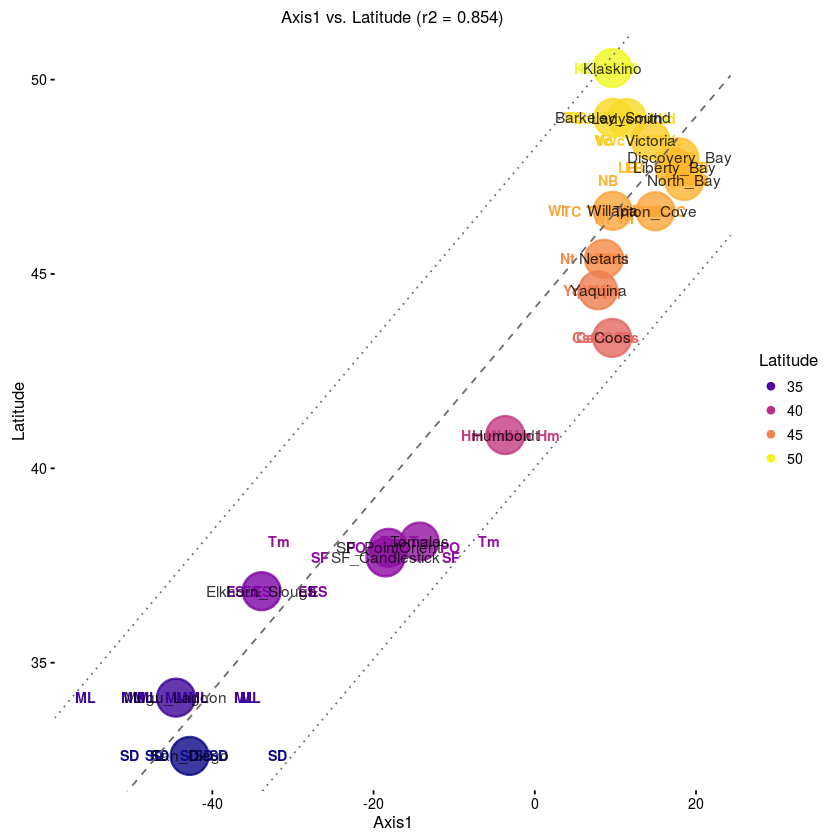

In [68]:
p = list(size=6)
plot(pviz,coords = c("Axis1","Latitude"),group="Population",show.legend = T,color="Latitude")

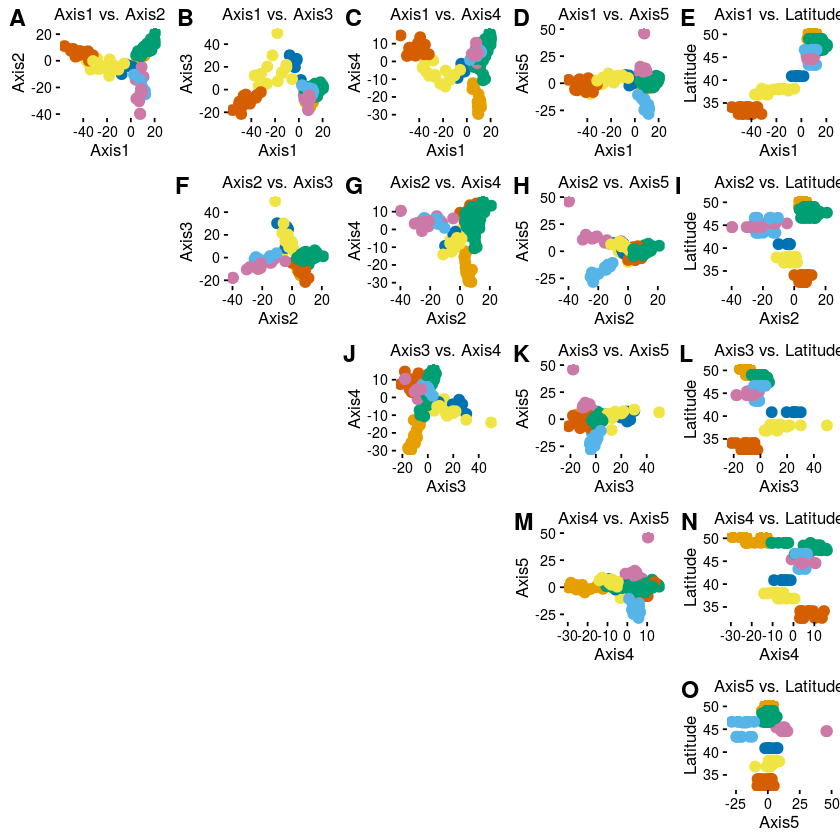

In [69]:
plot(pviz,coords = c("Axis1","Axis2","Axis3","Axis4","Axis5","Latitude"),group = NULL,color= "Region",draw.points = T,scale.pc.axes = 0.6, show.legend=F)